In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import numpy as np
from utils import *
from matplotlib import pyplot as plt
from roboflow import Roboflow
from segment_anything import SamPredictor, sam_model_registry
from helper_code.pipeline import run_pipeline
import os

In [7]:
rf = Roboflow(ROBOFLOW_API_KEY)
project = rf.workspace().project("final_annotation_classification")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [8]:
sam = sam_model_registry["default"](checkpoint="../../../Downloads/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

In [9]:
min_samples = 200

Directory '../results/8' already exists.
```json
{
  "x-axis": { 
    "title": "Cycle number", 
    "range": [0, 200] 
  },
  "y-axis": { 
    "title": "Irreversible capacity (mAh cm-2)", 
    "range": [0, 2.5] 
  },
  "second-y-axis": { 
    "title": null, 
    "range": null 
  },
  "types": [
    ["FFS", "blue"],
    ["LFF", "green"]
  ]
}
```
{'x-axis': {'title': 'Cycle number', 'range': [0, 200]}, 'y-axis': {'title': 'Irreversible capacity (mAh cm-2)', 'range': [0, 2.5]}, 'second-y-axis': {'title': None, 'range': None}, 'types': [['FFS', 'blue'], ['LFF', 'green']]}
{'topLeft': (115, 40), 'bottomRight': (665, 398)}


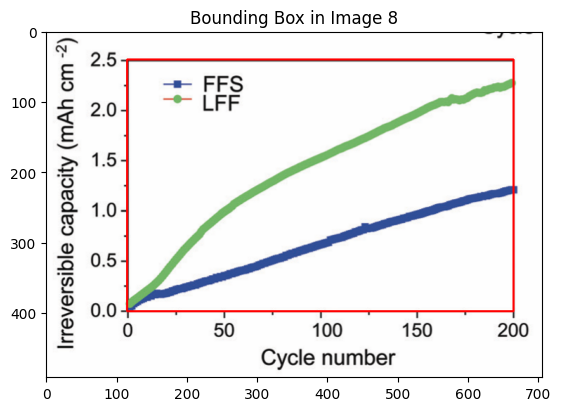

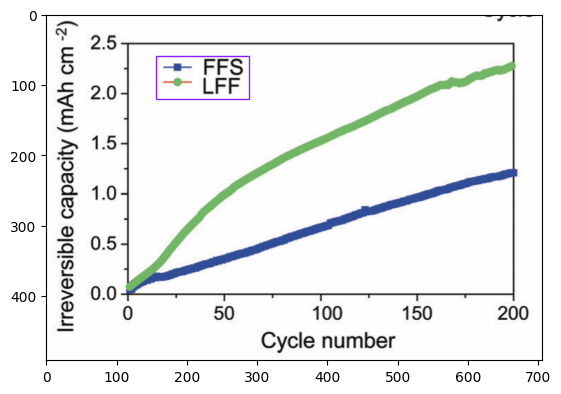

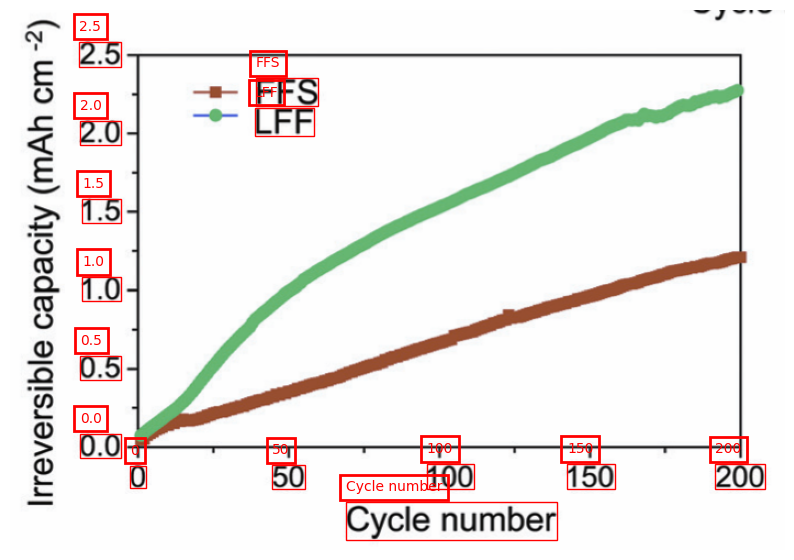

Y MIN 0.0
Y MAX 2.5
SEMANTIC Y MIN 0.0
SEMANTIC Y MAX 2.5
Y
OCR DIFF -356.9036231562495
SEM DIFF 2.5
OCR RATIO -142.7614492624998
PIXEL DIFF -1.3285436183214188
REAL DIFF FROM BASE POINT 0.009306039026534294
Y_MIN -0.009306039026534294
Y_MAX 2.4983737432215047
SEMANTIC X MIN 0.0
SEMANTIC X MAX 200.0
X
OCR DIFF 548.3856881856918
SEM DIFF 200.0
OCR RATIO 0.3647068191398112
PIXEL DIFF 1.2605218142271042
REAL DIFF FROM BASE POINT 0.45972090132311116
X_MIN -0.45972090132311116
X_MAX 200.12902962557303
X
Predicted [-0.45972090132311116, 200.12902962557303]
Chat GPT [0, 200]
Y
Predicted [-0.009306039026534294, 2.4983737432215047]
Chat GPT [0, 2.5]


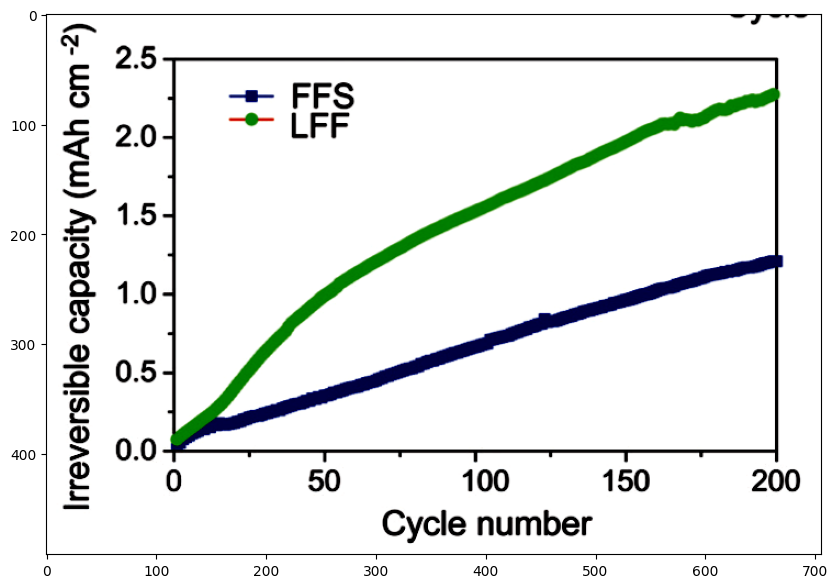

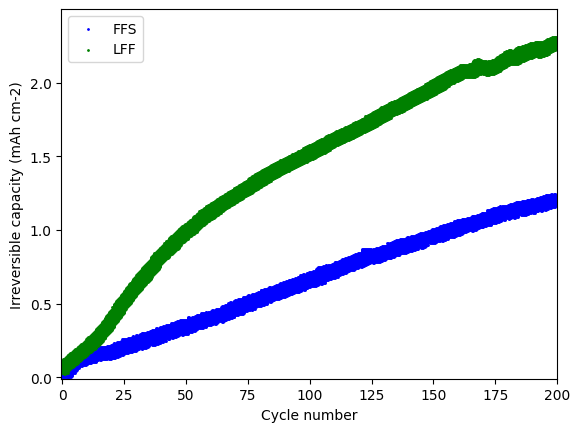

In [12]:
for image_num in [8]:
    run_pipeline(image_num, min_samples, predictor, model)